In [2]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

!mkdir datalake
!gdown --id 1ARYX8xxbkrsbnaswqjcLFneDf7YZ-t2D
!mv ./datalake.zip ./datalake
!unzip datalake/datalake.zip

# Create DiGraph

In [4]:
d = nx.DiGraph()
dias = [
    '2022-01-31',
    '2022-02-01', 
    '2022-02-02', 
    '2022-02-03', 
    '2022-02-04',
    '2022-02-05',
    '2022-02-06',
]

for dia in dias:
    with open(f'datalake/extract_date={dia}.json') as file:
        search_tweets = json.load(file)
        retweets = []
        for tweet in search_tweets:
            retweets.append(tweet)
        for retweet in retweets:
            retweeted_status = retweet['retweeted_status']
            retweeted_sn = retweeted_status['user']['screen_name']
            retweeter_sn = retweet['user']['screen_name']
            if d.has_edge(retweeted_sn, retweeter_sn):
                d.edges[retweeted_sn, retweeter_sn]['weight'] += 1
            else:
                d.add_edge(retweeted_sn, retweeter_sn, weight = 1)

d.remove_edges_from(list(nx.selfloop_edges(d)))

# Betweenness Centrality

/var/folders/k6/528t8tnx5llf4w8y5xx1rrm80000gn/T/ipykernel_8414/2850813404.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(nodes, fraction=1.5, pad=-1)


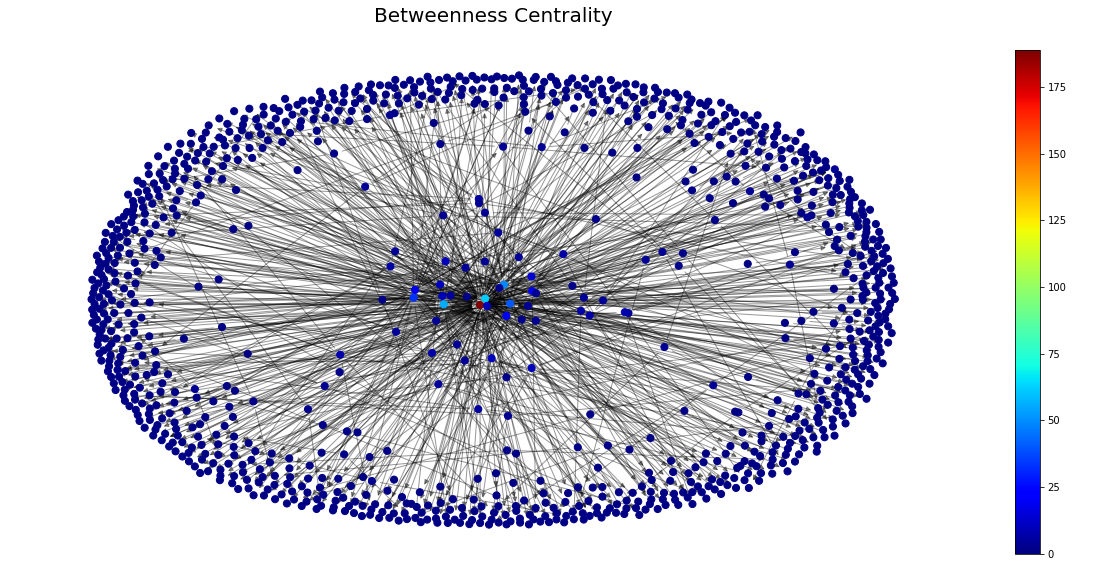

In [5]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

# layout position
pos = nx.spring_layout(d, seed=1234)
# color of nodes based on eccentricity
color = list(dict(nx.degree(d)).values())
# draw edges
edges = nx.draw_networkx_edges(
    d,
    pos=pos,
    alpha=0.4, ax=ax
)
# draw nodes
nodes = nx.draw_networkx_nodes(d,
    pos=pos,
    node_color=color,
    cmap=plt.cm.jet,ax=ax, node_size=50
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title('Betweenness Centrality', fontsize=20)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

plt.axis("off")
plt.colorbar(nodes, fraction=1.5, pad=-1)
plt.show()

In [216]:
# TOP 10 degree

key = []
values = []

for k, v in dict(nx.betweenness_centrality(d)).items():
    key.append(k)
    values.append(v)

df = pd.DataFrame({
        'no': key,
        'degree': values
    })

df.sort_values('degree', ascending=False, ignore_index=True).head(10)

,no,degree
0,JJRConservador,2.808668e-06
1,NelsonR69631579,1.872445e-06
2,PATRlOTAS,9.362226e-07
3,LilianaValente,9.362226e-07
4,MarcusJnior8,0.000000e+00
5,Reidealmeida1,0.000000e+00
6,CarlosJosMalaq1,0.000000e+00
7,Aristidesol,0.000000e+00
8,GdnSantos18,0.000000e+00
9,MamedeCacilda,0.000000e+00
